### Libraries

In [1]:
import os
import pandas as pd

### Upload Dataset

In [2]:
# Get the current working directory
directorio_actual = os.getcwd()

# Specify the relative path from the current directory
ruta_csv_relativa = os.path.join('..', 'data', '03_primary','3.spotify.csv')

# Load the CSV file

spotify = pd.read_csv(ruta_csv_relativa)
spotify.head(5)

,duration_ms_scaled,popularity_scaled,speechiness_scaled,acousticness_scaled,instrumentalness_scaled,liveness_scaled,loudness_scaled,danceability_scaled,energy_scaled,valence_scaled,tempo_scaled,track_genre,track_genre_encoded,intensity,popularity_class
0,0.461947,0.920689,0.494433,0.751530,0.050533,0.780650,0.507785,0.669059,0.460989,0.718593,0.301970,acoustic,0,0.311636,1
1,0.387347,0.849624,0.328098,0.994567,0.136151,0.510439,0.346606,0.394881,0.165983,0.268342,0.243282,acoustic,0,0.069720,1
2,0.446450,0.858572,0.244770,0.887294,0.000000,0.541840,0.441962,0.414159,0.358987,0.120603,0.236770,acoustic,0,0.157242,1
3,0.439024,0.913703,0.131397,0.993063,0.309253,0.567599,0.336724,0.229945,0.059581,0.143719,0.830006,acoustic,0,0.015854,1
4,0.436375,0.949954,0.229607,0.945470,0.000000,0.468269,0.442930,0.606940,0.442989,0.167839,0.482246,acoustic,0,0.273774,1


### Standar_Scaled

Explicar porque se realizo esto (en ingles)

In [3]:
from sklearn.preprocessing import StandardScaler

# Selecciona las características que quieres estandarizar
features = ['duration_ms_scaled', 'popularity_scaled', 'speechiness_scaled', 'acousticness_scaled',
            'instrumentalness_scaled', 'liveness_scaled', 'loudness_scaled',
            'danceability_scaled', 'energy_scaled', 'valence_scaled', 'tempo_scaled']

# Extraer las columnas para estandarizarlas
X_normalized = spotify[features]

# Aplicar StandardScaler para llevar los datos a media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X_normalized)
,
# Sobrescribir las columnas estandarizadas en el DataFrame original 'spotify'
spotify[features] = X_scaled

# Visualizar las primeras filas para confirmar los cambios
spotify.head(5)


,duration_ms_scaled,popularity_scaled,speechiness_scaled,acousticness_scaled,instrumentalness_scaled,liveness_scaled,loudness_scaled,danceability_scaled,energy_scaled,valence_scaled,tempo_scaled,track_genre,track_genre_encoded,intensity,popularity_class
0,0.220383,1.175748,1.215603,-0.247385,-0.874528,1.118338,0.068075,0.628742,-0.722218,0.928477,-1.161034,acoustic,0,0.311636,1
1,-0.919183,0.769006,0.326866,0.943214,-0.652616,-0.643117,-1.606376,-0.856596,-1.898577,-0.802499,-1.513321,acoustic,0,0.069720,1
2,-0.016348,0.820217,-0.118358,0.417702,-1.005503,-0.438419,-0.615741,-0.752159,-1.128959,-1.370475,-1.552408,acoustic,0,0.157242,1
3,-0.129787,1.135763,-0.724115,0.935844,-0.203954,-0.270505,-1.709040,-1.750120,-2.322864,-1.281608,2.008565,acoustic,0,0.015854,1
4,-0.170243,1.343246,-0.199375,0.702694,-1.005503,-0.918015,-0.605689,0.292220,-0.793996,-1.188877,-0.078905,acoustic,0,0.273774,1


## k-means

### Diagrama del codo

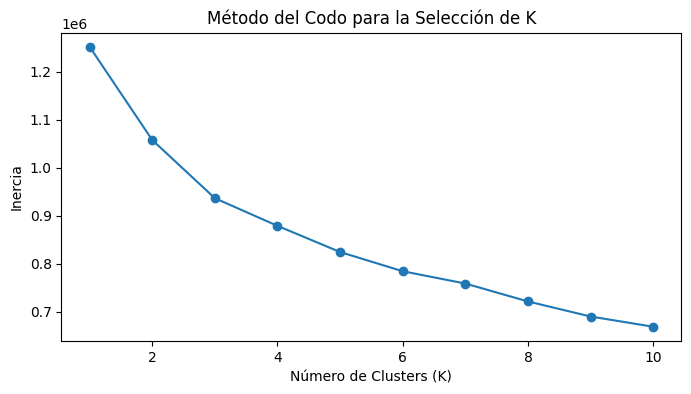

In [4]:
# Importar las librerías necesarias
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Suponiendo que tus datos están en un DataFrame de Pandas llamado `df`
# y que las características estandarizadas están en un rango de [0, 1]
features = ['duration_ms_scaled', 'popularity_scaled', 'speechiness_scaled', 'acousticness_scaled',
            'instrumentalness_scaled', 'liveness_scaled', 'loudness_scaled',
            'danceability_scaled', 'energy_scaled', 'valence_scaled', 'tempo_scaled']
X = spotify[features]  # Selección de las características para K-means

# Paso 1: Determinar el Número Óptimo de Clusters usando el Método del Codo
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para la Selección de K')
plt.show()


In [5]:
# Definir el valor de K según el resultado del método del codo
k_optimal = 3 # Ajusta este valor basado en el análisis del método del codo

# Aplicar K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
spotify['cluster'] = kmeans.fit_predict(X)

# Ver los centroides de cada cluster (opcional)
print("Centroides de los clusters:")
print(kmeans.cluster_centers_)


Centroides de los clusters:
[[ 0.33429896 -0.18308878  0.16173094 -1.30362501  0.58609684  0.13682993
   0.57541694 -0.44440282  0.87792953 -0.45568554  0.43579628]
 [-0.1781631   0.06678674  0.2525441   0.25885395 -0.53547628  0.05202971
   0.30129019  0.56355613  0.26128145  0.67254336 -0.02575045]
 [-0.00327934  0.04986137 -0.53038709  0.69327847  0.34255914 -0.19640459
  -0.95471915 -0.50567034 -1.14691268 -0.66631168 -0.32664832]]


c:\Users\joaco\Documents\Programación\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


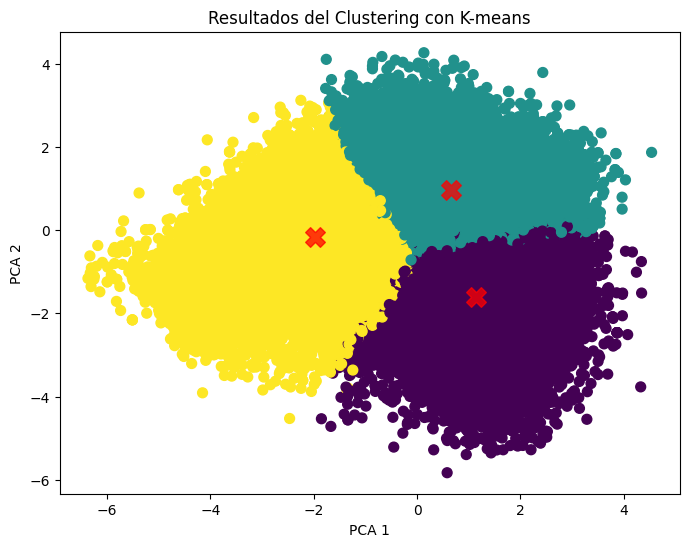

In [6]:
from sklearn.decomposition import PCA

# Reducir dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar los clusters con los centroides
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spotify['cluster'], cmap='viridis', s=50)
centers_pca = pca.transform(kmeans.cluster_centers_)  # Transformar los centroides
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Marcar centroides
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Resultados del Clustering con K-means")
plt.show()


### Diagrama de Silueta

Silhouette Score Promedio para K=5: 0.142


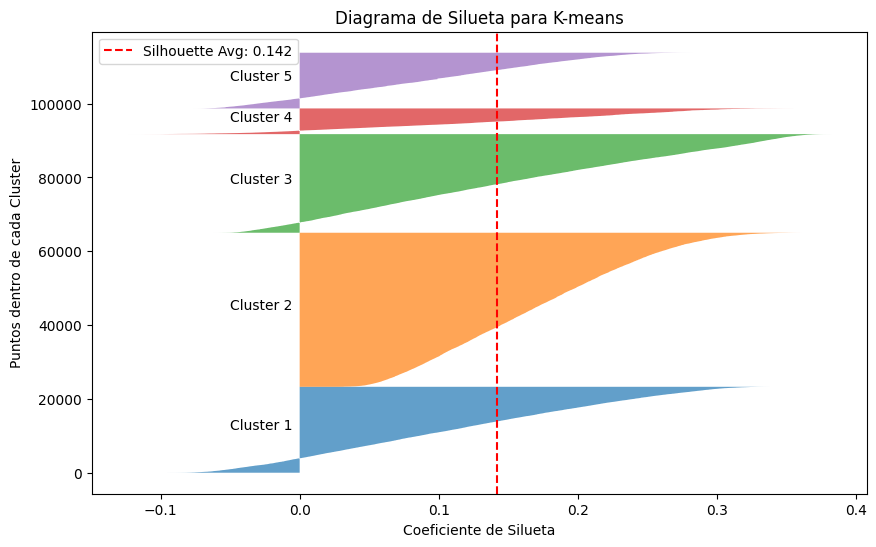

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Definir el número óptimo de clusters
k_optimal = 5  # Ajusta este valor según el análisis previo

# Aplicar K-means y calcular las etiquetas de clusters
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels = kmeans.fit_predict(X_scaled)  # X_scaled es el dataset estandarizado

# Calcular el coeficiente de silueta para cada punto
silhouette_vals = silhouette_samples(X_scaled, labels)

# Calcular la puntuación promedio de silueta
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score Promedio para K={k_optimal}: {silhouette_avg:.3f}")

# Crear el diagrama de silueta
plt.figure(figsize=(10, 6))
y_lower = 0
for i in range(k_optimal):
    # Extraer los valores de silueta para el cluster actual y ordenarlos
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    
    # Rellenar el gráfico para cada cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), f"Cluster {i + 1}")
    y_lower = y_upper

# Dibujar la línea del promedio de silueta
plt.axvline(silhouette_avg, color="red", linestyle="--", label=f"Silhouette Avg: {silhouette_avg:.3f}")
plt.xlabel("Coeficiente de Silueta")
plt.ylabel("Puntos dentro de cada Cluster")
plt.title("Diagrama de Silueta para K-means")
plt.legend()
plt.show()


In [ ]:
for k in range(2, 11):  # Probar de K=2 a K=10
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score para K={k}: {silhouette_avg:.3f}")

Silhouette Score para K=2: 0.148
Silhouette Score para K=3: 0.150
Silhouette Score para K=4: 0.156
Silhouette Score para K=5: 0.142
Silhouette Score para K=6: 0.122
